# Creating Graphs from Folder Structures with Python

In this notebook you will see how to use the [folderstats](https://github.com/njanakiev/folderstats) Python module to explore and analyze folder structures visualy as a graph.

# Installation

For this notebook you'll want to install the [folderstats](https://github.com/njanakiev/folderstats) which you can do with:

```bash 
pip install folderstats
```

You can use this module either as a command-line tool or as a module in your script. Here you will see how to do that as a module.

# Analyze Folder Structure of NetworkX Repository

You can download the [NetworkX](https://github.com/networkx/networkx) repository with:

```bash
git clone https://github.com/networkx/networkx
```

Now you can now create a Pandas dataframe from the folder structure with this line of code:

In [2]:
import folderstats

df = folderstats.folderstats('networkx')
df.head()

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent
0,2,networkx/CONTRIBUTING.rst,CONTRIBUTING,rst,5698,2019-04-25 16:11:12,2019-04-25 16:11:12,2019-04-25 16:11:12,False,NaN,0,1
1,3,networkx/RELEASE.rst,RELEASE,rst,2893,2019-04-25 16:11:12,2019-04-25 16:11:12,2019-04-25 16:11:12,False,NaN,0,1
2,4,networkx/.mailmap,.mailmap,None,213,2019-04-25 16:11:12,2019-04-25 16:11:12,2019-04-25 16:11:12,False,NaN,0,1
3,5,networkx/requirements.txt,requirements,txt,53,2019-04-25 16:11:12,2019-04-25 16:11:12,2019-04-25 16:11:12,False,NaN,0,1
4,6,networkx/INSTALL.rst,INSTALL,rst,6051,2019-04-25 16:11:12,2019-04-25 16:11:12,2019-04-25 16:11:12,False,NaN,0,1


Great! You can already do some analysis on the data, but we are focusing on file tree as a graph. Let's start by creating a graph from the folder structure by using the `id` amd `parent` columns. To do this you can use the [NetworkX](https://github.com/networkx/networkx) module:

In [11]:
import networkx as nx

# Sort files and directories by id
df_sorted = df.sort_values(by='id')

G = nx.Graph()
for i, row in df_sorted.iterrows():
    if row.parent:
        G.add_edge(row.id, row.parent)
        
# Print some additional information
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 878
Number of edges: 877
Average degree:   1.9977


# Exploring the Graph for the Folder Structure

We have the graph, but how can we visualize it? This can be done 

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Calculate positions of graph
pos_dot = graphviz_layout(G, prog='dot')

This returns a dictionary of positions that you can later use with the [networkx.draw_networkx_nodes()](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html) and [networkx.draw_networkx_edges()](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html) functions to plot the graphs:

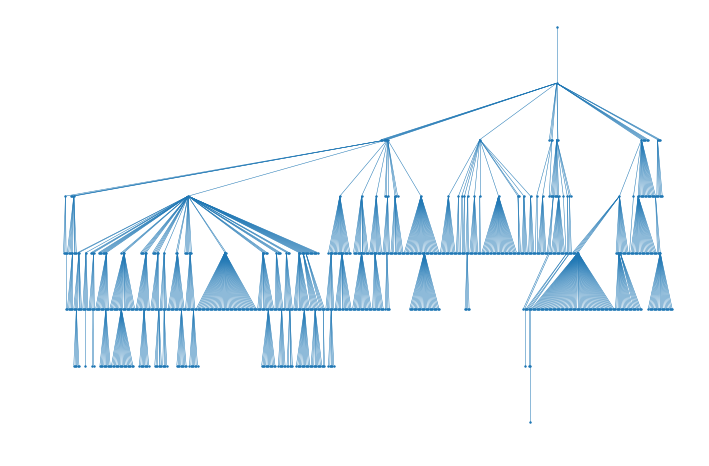

In [10]:
fig = plt.figure(figsize=(12, 8))
nodes = nx.draw_networkx_nodes(G, pos_dot, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_dot, edge_color='C0', width=0.5)
plt.axis('off');

In [7]:
# Calculate positions of graph
pos_twopi = graphviz_layout(G, prog='twopi', root=1)

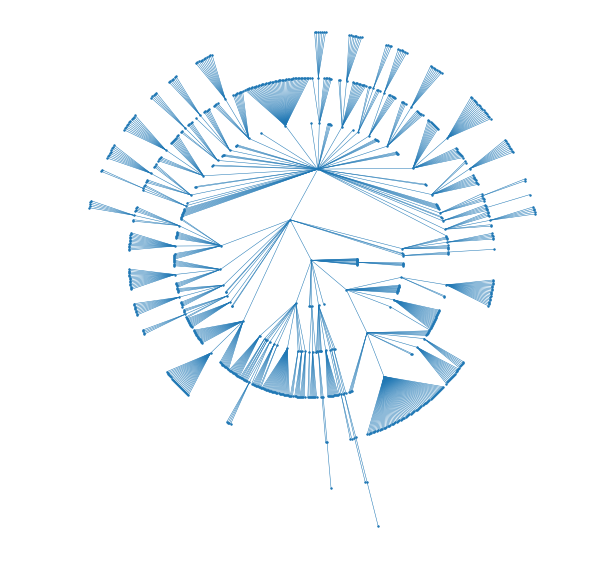

In [9]:
fig = plt.figure(figsize=(10, 10))
nodes = nx.draw_networkx_nodes(G, pos_twopi, node_size=2, node_color='C0')
edges = nx.draw_networkx_edges(G, pos_twopi, edge_color='C0', width=0.5)
plt.axis('off')
plt.axis('equal');

# Conclusion

You have learned in this notebook how to use the [folderstats](https://github.com/njanakiev/folderstats) module in concert with the [NetworkX](https://github.com/networkx/networkx) module to create beautiful graphs of folder structures/trees. You can read more on this topic in the article [Analyzing Your File System and Folder Structures with Python](https://janakiev.com/blog/python-filesystem-analysis/).